Linear Regression RMSE: 34.559782864138164
Linear Regression R2 Score: 0.5446346104387015
Random Forest RMSE: 15.577851682207376
Random Forest R2 Score: 0.9074805297547748


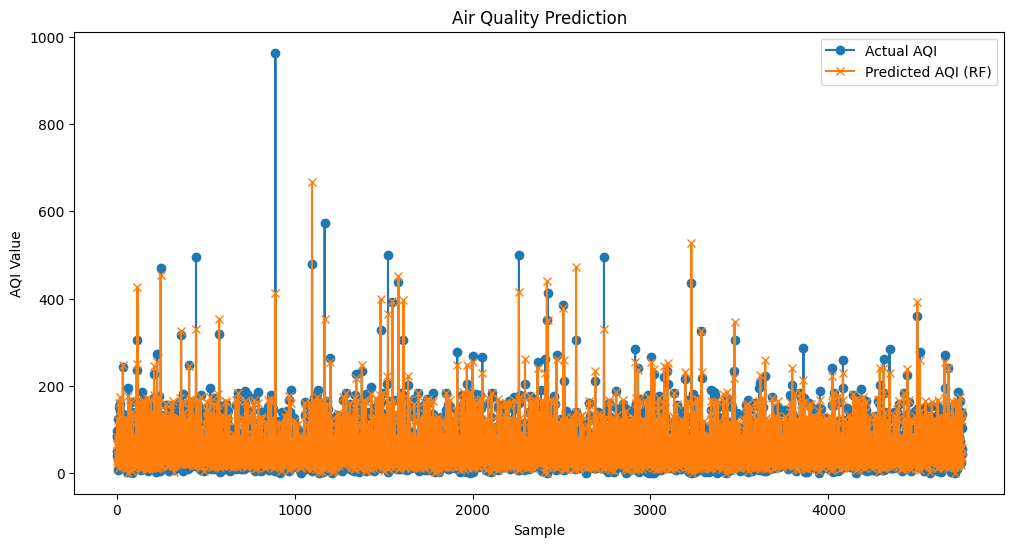

In [12]:
# --------------------------
# Air Quality Prediction
# --------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------
# Step 1: Load Dataset
# --------------------------
df = pd.read_csv("data_date.csv", parse_dates=['Date'])

# Strip column names of spaces
df.columns = df.columns.str.strip()

# --------------------------
# Step 2: Data Preprocessing
# --------------------------
# Convert 'AQI Value' to numeric
df['AQI Value'] = pd.to_numeric(df['AQI Value'].astype(str).str.strip(), errors='coerce')

# Fill missing values using .ffill()
df['AQI Value'] = df['AQI Value'].ffill()
df['Status'] = df['Status'].ffill()
df['Country'] = df['Country'].ffill()

# Encode categorical variables
le_status = LabelEncoder()
df['Status_encoded'] = le_status.fit_transform(df['Status'])

le_country = LabelEncoder()
df['Country_encoded'] = le_country.fit_transform(df['Country'])

# Extract features from Date
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Define features and target
X = df[['day', 'month', 'year', 'Status_encoded', 'Country_encoded']]
y = df['AQI Value']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# Step 3: Linear Regression
# --------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

# --------------------------
# Step 4: Random Forest Regressor
# --------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

# --------------------------
# Step 5: Visualize Predictions
# --------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual AQI', marker='o')
plt.plot(y_pred_rf, label='Predicted AQI (RF)', marker='x')
plt.title("Air Quality Prediction")
plt.xlabel("Sample")
plt.ylabel("AQI Value")
plt.legend()
plt.show()


Test RMSE: 32.95684078132664


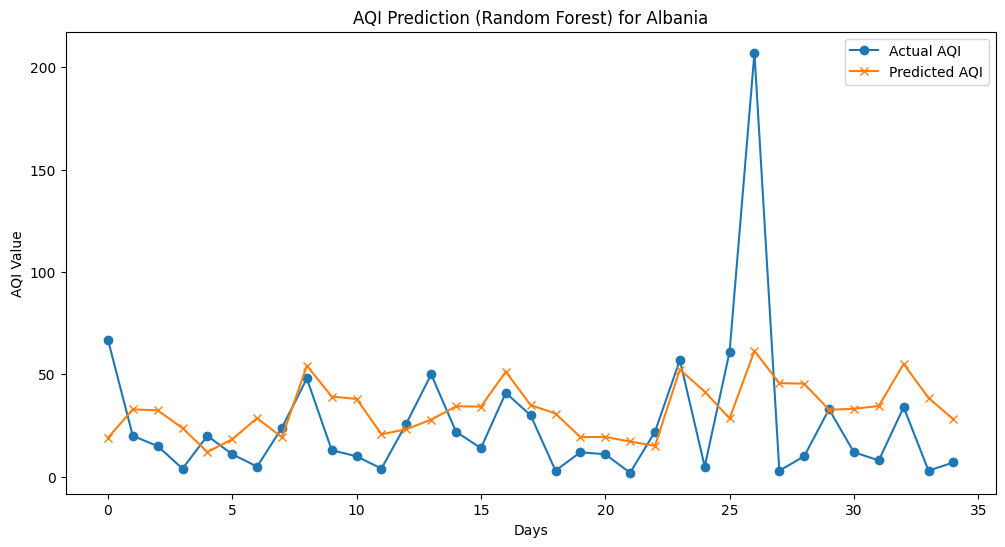

Predicted AQI for next 7 days: [np.float64(30.6), np.float64(60.3), np.float64(17.76), np.float64(23.41), np.float64(25.21), np.float64(16.9), np.float64(15.13)]


In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Load Dataset
# --------------------------
df = pd.read_csv("data_date.csv", parse_dates=['Date'])
df.columns = df.columns.str.strip()  # clean column names

# Use a single country (optional)
country_name = df['Country'].iloc[0]
df = df[df['Country'] == country_name].sort_values('Date')

# Convert AQI Value to numeric
df['AQI Value'] = pd.to_numeric(df['AQI Value'].astype(str).str.strip(), errors='coerce')
df['AQI Value'] = df['AQI Value'].ffill()

# --------------------------
# Step 2: Create Lag Features
# --------------------------
# Use past 7 days to predict next day
lag_days = 7
for i in range(1, lag_days+1):
    df[f'lag_{i}'] = df['AQI Value'].shift(i)

df = df.dropna()

# Features and target
X = df[[f'lag_{i}' for i in range(1, lag_days+1)]]
y = df['AQI Value']

# --------------------------
# Step 3: Train/Test Split
# --------------------------
split = int(len(df)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --------------------------
# Step 4: Train Random Forest
# --------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# --------------------------
# Step 5: Plot Predictions
# --------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual AQI', marker='o')
plt.plot(y_pred, label='Predicted AQI', marker='x')
plt.title(f"AQI Prediction (Random Forest) for {country_name}")
plt.xlabel("Days")
plt.ylabel("AQI Value")
plt.legend()
plt.show()

# --------------------------
# Step 6: Predict Next 7 Days (fixed)
# --------------------------
last_values = df['AQI Value'].values[-lag_days:].tolist()
future_preds = []

for _ in range(7):
    # Create a DataFrame with correct column names
    input_df = pd.DataFrame([last_values[-lag_days:]], columns=[f'lag_{i}' for i in range(1, lag_days+1)])
    pred = rf_model.predict(input_df)[0]
    future_preds.append(pred)
    last_values.append(pred)

print("Predicted AQI for next 7 days:", future_preds)

Test RMSE: 32.95684078132664


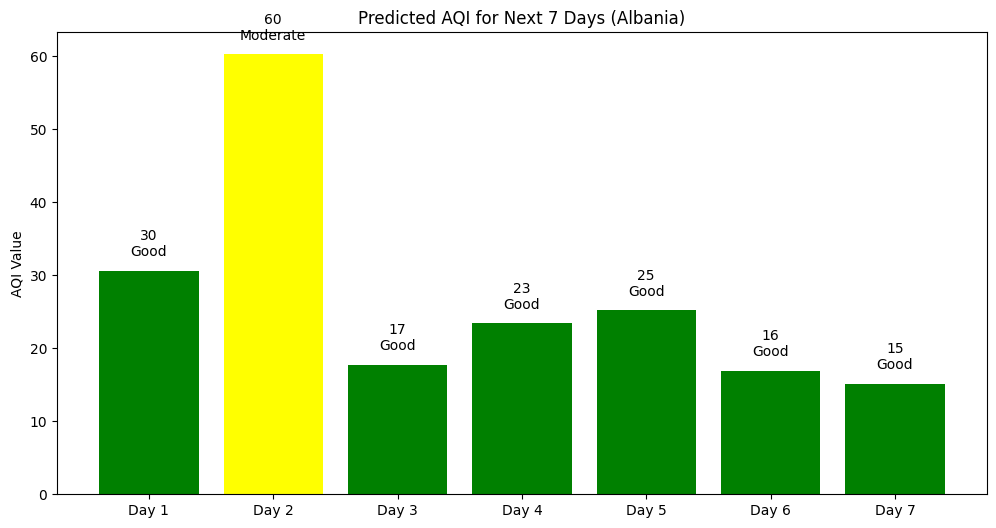

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Load Dataset
# --------------------------
df = pd.read_csv("data_date.csv", parse_dates=['Date'])
df.columns = df.columns.str.strip()

# Use a single country (optional)
country_name = df['Country'].iloc[0]
df = df[df['Country'] == country_name].sort_values('Date')

# Convert AQI Value to numeric
df['AQI Value'] = pd.to_numeric(df['AQI Value'].astype(str).str.strip(), errors='coerce')
df['AQI Value'] = df['AQI Value'].ffill()

# --------------------------
# Step 2: Create Lag Features
# --------------------------
lag_days = 7
for i in range(1, lag_days+1):
    df[f'lag_{i}'] = df['AQI Value'].shift(i)
df = df.dropna()

X = df[[f'lag_{i}' for i in range(1, lag_days+1)]]
y = df['AQI Value']

# --------------------------
# Step 3: Train/Test Split
# --------------------------
split = int(len(df)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --------------------------
# Step 4: Train Random Forest
# --------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# --------------------------
# Step 5: Predict Next 7 Days
# --------------------------
last_values = df['AQI Value'].values[-lag_days:].tolist()
future_preds = []

for _ in range(7):
    input_df = pd.DataFrame([last_values[-lag_days:]], columns=[f'lag_{i}' for i in range(1, lag_days+1)])
    pred = rf_model.predict(input_df)[0]
    future_preds.append(pred)
    last_values.append(pred)

# --------------------------
# Step 6: AQI Alert Classification
# --------------------------
def aqi_alert_category(aqi):
    if aqi <= 50:
        return "Good", "green"
    elif aqi <= 100:
        return "Moderate", "yellow"
    elif aqi <= 200:
        return "Unhealthy", "orange"
    elif aqi <= 300:
        return "Very Unhealthy", "red"
    else:
        return "Hazardous", "purple"

categories = [aqi_alert_category(aqi) for aqi in future_preds]
labels, colors = zip(*categories)

# --------------------------
# Step 7: Visualize Predicted AQI + Alerts
# --------------------------
plt.figure(figsize=(12,6))
plt.bar(range(1,8), future_preds, color=colors)
plt.xticks(range(1,8), [f"Day {i}" for i in range(1,8)])
plt.title(f"Predicted AQI for Next 7 Days ({country_name})")
plt.ylabel("AQI Value")

# Add labels on top of bars
for i, (val, label) in enumerate(zip(future_preds, labels)):
    plt.text(i+1, val+2, f"{int(val)}\n{label}", ha='center')

plt.show()